# Support Vector Machines 

In this first notebook on the topic of Support Vector Machines, we will explore the intuition behind the weights and coefficients by solving a simple SVM problem by hand. 

The code in this notebook served to produce the following stats.stackexchange posts:
- https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights/355043#355043
- https://stats.stackexchange.com/questions/353552/support-vector-machine-calculate-w-by-hand/353705#353705

### Source:
- https://ai6034.mit.edu/wiki/images/SVM_and_Boosting.pdf

### Libraries and utility functions

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def geo_margin(y,w,b,x):
    return y*(w / np.linalg.norm(w)).T @ x + (b / np.linalg.norm(w)).flatten()

def functional_margin(y,w,b,x):
    return y*(w.T @ x + b).flatten()

def f(x, w, b, c=0):
    # given x1, return x2 such that [x1,x2] are on the line w.x + b = c
    return (-w[0] * x - b + c) / w[1]

## Dataset and inspection

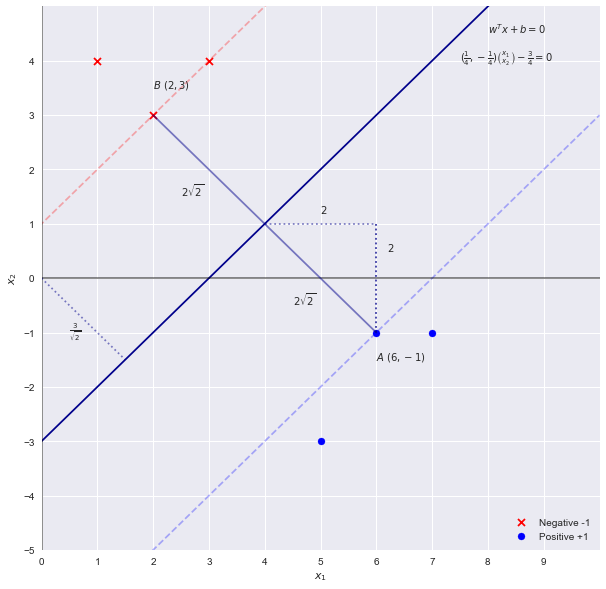

In [3]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))
plt.annotate(s = '$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.show()

## Solving the SVM problem by inspection
By inspection we can see that the boundary decision line is the function $x_2 = x_1 - 3$. Using the formula $w^T x + b = 0$ we can obtain a first guess of the parameters as 

$$ w = [1,-1] \ \ b = -3$$

Using these values we would obtain the following *width* between the support vectors: $\frac{2}{\sqrt{2}} = \sqrt{2}$. Again by inspection we see that the width between the support vectors is in fact of length $4 \sqrt{2}$ meaning that these values are incorrect. 

Recall that scaling the boundary by a factor of $c$ does not change the boundary line, hence we can generalize the equation as 

$$ cx_1 - xc_2 - 3c = 0$$
$$ w = [c,-c] \ \ b = -3c$$

Plugging back into the equation for the width we get

\begin{aligned}
    \frac{2}{||w||} & = 4 \sqrt{2}
    \\
    \frac{2}{\sqrt{2}c} & = 4 \sqrt{2}
    \\
    c = \frac{1}{4}
\end{aligned}

Hence the parameters are in fact 
$$ w = [\frac{1}{4},-\frac{1}{4}] \ \ b = -\frac{3}{4}$$

To find the values of $\alpha_i$ we can use the following two constraints which come from the dual problem:

$$ w = \sum_i^m \alpha_i y^{(i)} x^{(i)} $$
$$\sum_i^m \alpha_i y^{(i)} = 0	$$

And using the fact that $\alpha_i \geq 0$ for support vectors only (i.e. 3 vectors in this case) we obtain the system of simultaneous linear equations: 
\begin{aligned}
    \begin{bmatrix} 6 \alpha_1 - 2 \alpha_2 - 3 \alpha_3 \\ -1 \alpha_1 - 3 \alpha_2 - 4 \alpha_3 \\ 1 \alpha_1 - 2 \alpha_2 - 1 \alpha_3   \end{bmatrix} & = \begin{bmatrix} 1/4 \\ -1/4 \\ 0 \end{bmatrix}
    \\
    \alpha & =  \begin{bmatrix} 1/16 \\ 1/16 \\ 0 \end{bmatrix}
\end{aligned}


## Checking the results using Sklearn 

In [4]:
from sklearn.svm import SVC

X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))


w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]
